In [24]:
from sklearn.mixture import GMM
import pandas as pd
import numpy as np
import matplotlib
from collections import Counter
import scipy.stats as st

%matplotlib inline
import matplotlib.pyplot as plt

In [80]:
df_oneSide=pd.read_csv('../data/bbContextOntopicRepliesOnlyDF.csv',sep=';')

In [81]:
df_oneSide['dateObj']=pd.to_datetime(df_oneSide.date)

In [82]:
df_oneSide=df_oneSide.sort(['user_id','dateObj'])

-c:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


## Limit the data to the Analysis Window of 10/15/2012-11/23/2012

In [83]:
df_oneSide.dateObj=df_oneSide.dateObj.apply(lambda x: x-pd.to_timedelta('0 days 04:00:00') if x<pd.to_datetime('2012-11-03 22:00:00') else x-pd.to_timedelta('0 days 05:00:00'))

In [84]:
df_oneSide=df_oneSide[(df_oneSide.dateObj>=pd.to_datetime('2012-10-15 00:00:00')) & (df_oneSide.dateObj<pd.to_datetime('2012-11-24 00:00:00'))]

In [85]:
len(df_oneSide)

1576214

In [86]:
replies=df_oneSide[df_oneSide.replyWho!='0']

In [87]:
len(replies)

475092

In [88]:
grouped=df_oneSide.groupby('user_id')

In [91]:
df_oneSide['secDiff']=(grouped.dateObj.diff()).apply(lambda x: np.nan if pd.isnull(x) else x.item()/(10**9))

AttributeError: 'Timedelta' object has no attribute 'item'

In [90]:
np.max(df_oneSide.secDiff)

86399.0

In [30]:
# fit models with 1-10 components
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GMM(N[i]).fit(data)

ValueError: GMM expects at least 2 samples provided in a 2 dimensional array-like input

In [20]:
# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

13764

In [65]:
temp=np.log(df_oneSide.secDiff[df_oneSide.secDiff!=0].dropna())

(array([  1868.,      0.,      0.,   2292.,   3255.,      0.,   3814.,
         8051.,   4253.,   9369.,  14645.,  14638.,  19151.,  23291.,
        26304.,  28507.,  37955.,  41919.,  48382.,  49668.,  52534.,
        53188.,  53446.,  52163.,  48466.,  48050.,  46163.,  43432.,
        42513.,  42019.,  41239.,  41465.,  41782.,  42105.,  42153.,
        43013.,  43534.,  43140.,  42060.,  40806.,  38264.,  35209.,
        31699.,  28255.,  27718.,  33493.,  38143.,  34457.,  29768.,
        28850.]),
 array([  0.        ,   0.22733463,   0.45466926,   0.68200388,
         0.90933851,   1.13667314,   1.36400777,   1.59134239,
         1.81867702,   2.04601165,   2.27334628,   2.5006809 ,
         2.72801553,   2.95535016,   3.18268479,   3.41001941,
         3.63735404,   3.86468867,   4.0920233 ,   4.31935792,
         4.54669255,   4.77402718,   5.00136181,   5.22869644,
         5.45603106,   5.68336569,   5.91070032,   6.13803495,
         6.36536957,   6.5927042 ,   6.82003883, 

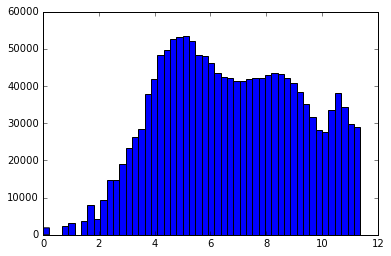

In [70]:
plt.hist(temp,50)

In [71]:
max(temp)

11.366731380651093